<H1> Remedial JC DS AH 2020 (13th Sept 2020)

Welcome to remedial test. Hope it goes smooth and well :)

- Data: Wine Quality Data Set
- Jumlah kolom: 13
- Jumlah baris: 1599

Keterangan kolom:


1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
12. Quality (score between 0 and 10)
13. Quality_cat: Category that shows the quality of wine (Medium, High)

<H2> SOAL REMEDIAL

1) Lakukan data preparation step pada data tersebut. Boleh dilakukan cleaning, transforming, maupun enriching pada data. **Minimal 2 step**. (BOBOT: 25)
- Clue: Cleaning dilakukan dengan membersihkan karakter yang tidak sesuai pada data, contohnya "." atau "," pada data numerik. Transforming dilakukan dengan mengubah tipe data atau mengubah kolom. Enriching dilakukan dengan menambahkan satu kolom yang merupakan hasil operasi dari kolom lain, contoh: membuat kolom kategori dari data numerik.

2) Lakukan visualisasi data pada data yang sudah di-prepared. **Minimal 3 visualisasi, lengkap dengan analisisnya.** (BOBOT: 75)
- Contoh: 
  - **Visualisasi** 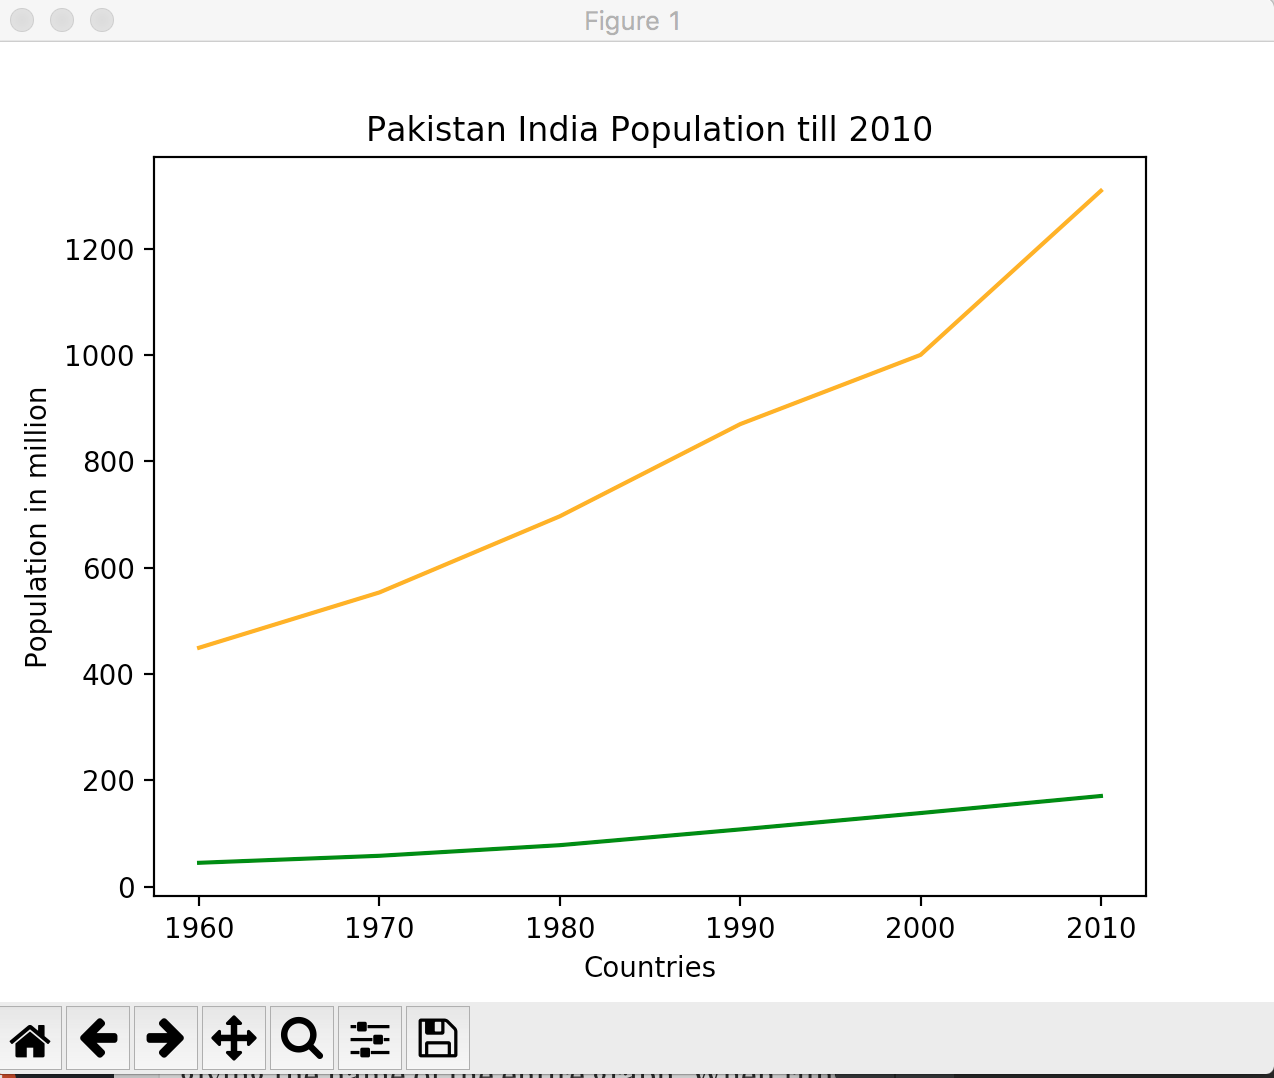
    - **Analisis**: Chart ini menunjukkan populasi India dan Pakistan hingga tahun 2010. Berdasarkan chart tersebut maka terdapat peningkatan yang pesat pada populasi India dibandingkan Pakistan. Hal tersebut bisa disebabkan oleh adanya konflik yang terjadi di Pakistan, sehingga populasinya tidak meningkat setinggi India.

<h2> SUBMISSION: <h2>

* Jawaban ditulis di Jupyter Notebook (.ipynb)
* Kirim jawaban ke regitaz@gmail.com & cc Angel Operational Purwadhika.
* Submit jawaban ke Github

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [6]:
wine = pd.read_csv('C:/Users/adinatha/Desktop/REMEDIAL PWDK/wine_quality.csv') #import data

In [14]:
wine.head() 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,High
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Medium


In [11]:
wine.info() #info menunjukkan tipe data yang sudah sesuai dan tidak terdapat null di dalam database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed_acidity        1599 non-null   float64
 1   volatile_acidity     1599 non-null   float64
 2   citric_acid          1599 non-null   float64
 3   residual_sugar       1599 non-null   float64
 4   chlorides            1599 non-null   float64
 5   free_sulfurdioxide   1599 non-null   int64  
 6   total_sulfurdioxide  1599 non-null   int64  
 7   density              1599 non-null   float64
 8   pH                   1599 non-null   float64
 9   sulphates            1599 non-null   float64
 10  alcohol              1599 non-null   float64
 11  quality              1599 non-null   int64  
 12  quality_cat          1599 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 162.5+ KB


In [12]:
wine.describe() #menggambarkan kesimpulan dari distribusi data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
fixed_acidity_cat=[] # membuat kolom baru untuk mengkategorikan tingkat keasaman dengan mengambil nilai tengah dari data
for item in wine['fixed_acidity']:
    if item <= 7.9:
        fixed_acidity_cat.append('Low')
    else:
        fixed_acidity_cat.append('High')

wine['fixed_acidity_cat']=fixed_acidity_cat

In [32]:
wine.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfurdioxide,total_sulfurdioxide,density,pH,sulphates,alcohol,quality,quality_cat,fixed_acidity_cat
888,6.8,0.570,0.00,2.50,0.072,32,64,0.99491,3.43,0.56,11.2,6,High,Low
690,7.4,1.185,0.00,4.25,0.097,5,14,0.99660,3.63,0.54,10.7,3,Medium,Low
1455,6.5,0.900,0.00,1.60,0.052,9,17,0.99467,3.50,0.63,10.9,6,High,Low
1377,5.2,0.490,0.26,2.30,0.090,23,74,0.99530,3.71,0.62,12.2,6,High,Low
1088,11.6,0.410,0.54,1.50,0.095,22,41,0.99735,3.02,0.76,9.9,7,High,High
365,10.0,0.420,0.50,3.40,0.107,7,21,0.99790,3.26,0.93,11.8,6,High,High
917,6.8,0.410,0.31,8.80,0.084,26,45,0.99824,3.38,0.64,10.1,6,High,Low
114,7.8,0.560,0.19,1.80,0.104,12,47,0.99640,3.19,0.93,9.5,5,Medium,Low
1406,8.2,0.240,0.34,5.10,0.062,8,22,0.99740,3.22,0.94,10.9,6,High,High
428,9.1,0.520,0.33,1.30,0.070,9,30,0.99780,3.24,0.60,9.3,5,Medium,High


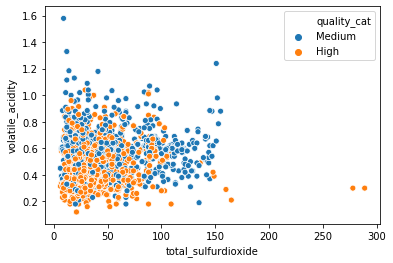

In [71]:
sns.scatterplot(data = wine, x='total_sulfurdioxide', y = 'volatile_acidity', hue = 'quality_cat')

Analisis 1 : Plot scatter total_sulfurdioxide x volatile_acidity menggambarkan kualitas wine yang baik memiliki tingkat total sulfurdioksida dan keasaman volatil yang relatif rendah, namun tidak terdapat hubungan yang signifikan antara total sulfur dengan keasaman volatil.

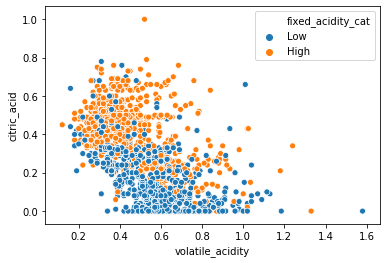

In [81]:
sns.scatterplot(data = wine, x='volatile_acidity', y = 'citric_acid', hue = 'fixed_acidity_cat')

Analisis 2: Scatter plot citric_acid x volatile_acidity dengan hue fixed_acidity_cat menggambarkan tingkat keasaman paten dari wine secara umum memiliki asam sitrus yang tinggi dan asam volatil yang rendah - menengah.

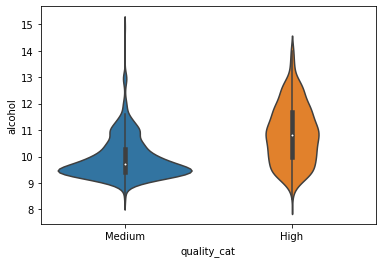

In [85]:
sns.violinplot(data = wine, x='quality_cat', y = 'alcohol')

Analisis 3: violin plot quality_cat x alcohol menggambarkan tingkat kualitas wine yang baik memiliki tingkat alkohol secara umum relatif lebih tinggi, namun distribusi terbesar di temukan pada kualitas wine medium dengan tingkat alkohol 9-10.